In [1]:
import multiprocessing as mp
import numpy as np
import matplotlib

import matplotlib.pyplot as plt

In [4]:
#path = "../../solve_runs/runs/run_0064_0064mpc_newt/"
path = "../../solve_runs/runs/run_0064_0064mpc_mond_small_a0_without_m/"
#path = "../../solve_runs/runs/run_0064_0064mpc_mond_m_0/"
box  = 64.0
grid = 64

x=np.linspace(0,grid,grid)
y=np.linspace(0,grid,grid)
xv, yv = np.meshgrid(x,y)

# make one plot:
def plot_one(plot_number):
    print(plot_number)
    data=open("%s/solve.phi.%05i" % (path, plot_number+1))
    tmp1 = np.fromfile(data, dtype=np.float64, count = 3*grid**2)
    data.close()
    tmp2 = np.reshape(tmp1, [grid**2,3])
    rho   = np.reshape(tmp2[:,0], [grid, grid])
    phi   = np.reshape(tmp2[:,1], [grid, grid])
    force = np.reshape(tmp2[:,2], [grid, grid])
   
    plt.figure(figsize=(15,12))

    plt.subplot(2,2,1)
    plt.title("F")
    plt.grid()
    xx = np.linspace(0, box, grid) # WARNING: there is no shift in here.
    min = np.amin(phi)
    max = np.amax(phi)
    plt.pcolormesh(xx, xx, phi, vmin=min, vmax=max)  #, cmap='inferno')
    plt.colorbar()
     
    plt.subplot(2,2,2)
    plt.title("log10(delta)")
    plt.grid()
    min = -2.0
    max = 3.0
    plt.pcolormesh(xx, xx, np.log10(np.abs(rho+1.01)), vmin=min, vmax=max)
    plt.colorbar()
    
    plt.subplot(2,2,3)
    plt.title("force")
    plt.grid()
    plt.pcolormesh(xx, xx, force)
    plt.colorbar()
            
    #plt.savefig('map_%05i.png' % (plot_number + 1)) #, dpi=1024)
    #plt.close("all")
    plt.show()
    

0


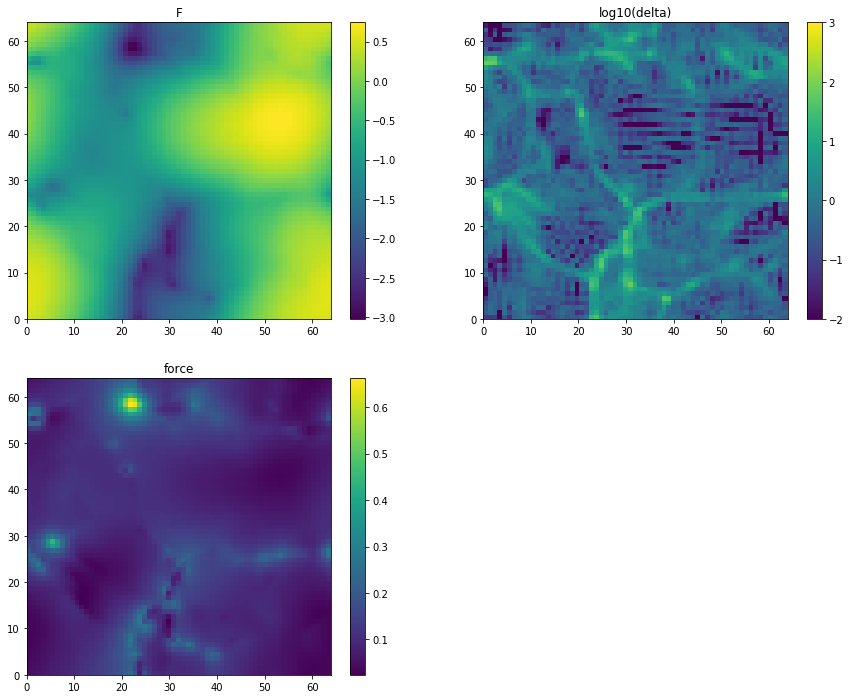

In [5]:
# Count number of processes:
#pool = mp.Pool(mp.cpu_count())
pool = mp.Pool(1)

# Make all the plots in parallel:
plots = range(0,1,1)
output_list = pool.map(plot_one, plots) 
#output_list = map(plot_one, plots) 